In [1]:
# import libraries 
import pandas as pd

In [2]:
#show all rows in pandas dataframe
pd.set_option('display.max_rows', None)

In [3]:
# load dataset
data = pd.read_csv("arrhythmia.csv", na_values="?")
print(data.shape)
data.head()

(452, 280)


,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


# Exploratory Data Analysis

In [4]:
# data types
data.dtypes.value_counts()

int64      155
float64    125
Name: count, dtype: int64

In [5]:
# Let's remove the columns with only one unique values (columns with zero variance)
data = data.loc[:, ~data.apply(lambda x: x.nunique() == 1)]

We do not really know which variables are continuos or categorical, so let's create simple heuristic, columns with less than 10 unique values will be converted to categorical variables  

In [6]:
# define categorical and numerical variables
cat_variables = data.loc[:, data.apply(lambda x: x.nunique() < 10)].columns.tolist()
num_variables = data.loc[:, data.apply(lambda x: x.nunique() >= 10)].columns.tolist()
num_variables.remove("class")

In [7]:
# let's change the dtype of variables less than 20 unique values to categorical
data = data.astype({k:"category" for k in cat_variables + ["class"]})

### Null values

In [8]:
# find columns with null values
data.loc[:, data.apply(lambda x: x.isnull().any(), axis=0)].isnull().mean()*100

T             1.769912
P             4.867257
QRST          0.221239
J            83.185841
heartrate     0.221239
dtype: float64

In [9]:
data.loc[:, data.apply(lambda x: x.isnull().any(), axis=0)].dtypes

T            float64
P            float64
QRST         float64
J            float64
heartrate    float64
dtype: object

In [10]:
# drop variables with null variables greater than 20%
data = data.loc[:, data.apply(lambda x:x.isnull().mean() < 0.2 )]
num_variables.remove("J")

In [11]:
"chDII_RPwave" in cat_variables

True

In [12]:
for var in cat_variables:
    if var == "chDII_RPwave":
        print("yes")

yes


In [13]:
# remove categorical variables with too few values
for var in cat_variables:
    if var == "chDII_RPwave":
        print("yes")
    if (data[var].value_counts() < 2).any():
        data.drop([var], axis=1, inplace=True)

cat_variables = data.select_dtypes(include="category").columns

yes


## Univariant Analysis of Numerical Variables

**Variables that follow a normal distribution:** \
['age',
 'QRST',
 'chDIII_Rwave',
 'chDI_QRSTA',
 'chDII_QRSA',
 'chDII_QRSTA',
 'chDIII_QRSA',
 'chDIII_QRSTA',
 'chAVR_QRSTA',
 'chAVL_QRSTA',
 'chAVF_QRSA',
 'chAVF_QRSTA',
 'chV3_QRSTA',
 'chV4_RwaveAmp',
 'chV4_QRSTA',
 'chV5_RwaveAmp',
 'chV5_QRSA',
 'chV5_QRSTA',
 'chV6_RwaveAmp',
 'chV6_QRSTA']


**Outliers** \
In general there are plenty of outliers that can be corrected before training

In [14]:
# import libraries
from mlutilities.eda import kolmogorov_test_widget
from mlutilities.eda import kolmogorov_test

In [15]:
# Test normality using kolmogorov test
kolmogorov_test_widget(data)

Output()

In [16]:
# Variables that follows a normal distribution
ktest_results = {var:kolmogorov_test(data, var, return_test=True) for var in num_variables}
ktest_results = pd.Series({k:v[-1] for k , v in ktest_results.items()})

------------------------- Kolmogorov test fot the variable age --------------------
statistic=0.038, p_value=0.532

Since 0.532 > 0.05 you cannot reject the null hypothesis, so the variable age 
follows a normal distribution
-------------------------------------------------------------------------------------------

------------------------- Kolmogorov test fot the variable height --------------------
statistic=0.329, p_value=0.000

Since 0.000 < 0.05 you can reject the null hypothesis, so the variable height 
do not follow a normal distribution
-------------------------------------------------------------------------------------------

------------------------- Kolmogorov test fot the variable weight --------------------
statistic=0.067, p_value=0.032

Since 0.032 < 0.05 you can reject the null hypothesis, so the variable weight 
do not follow a normal distribution
-------------------------------------------------------------------------------------------

------------------------- Ko

In [17]:
# Variables that follows a normal distribution
ktest_results[ktest_results == 'Normal distribution'].index.tolist()

['age',
 'QRST',
 'chDIII_Rwave',
 'chDI_QRSTA',
 'chDII_QRSA',
 'chDII_QRSTA',
 'chDIII_QRSA',
 'chDIII_QRSTA',
 'chAVR_QRSTA',
 'chAVL_QRSTA',
 'chAVF_QRSA',
 'chAVF_QRSTA',
 'chV3_QRSTA',
 'chV4_RwaveAmp',
 'chV4_QRSTA',
 'chV5_RwaveAmp',
 'chV5_QRSA',
 'chV5_QRSTA',
 'chV6_RwaveAmp',
 'chV6_QRSTA']

### Univariant Analysis of Categorical Variables

In [18]:
# import countplot widget
from mlutilities.eda import countplot_widget

In [19]:
# visualize categorical variables
countplot_widget(data)

Output()

### Multivariant Analysis

#### Correlation between categorical variable and numerical variable

We could remove variables that are low correlated with the target variable `class`

In [20]:
from mlutilities.eda import cramersv_heatmap
from mlutilities.eda import cramerv_widget
from mlutilities.eda import cramersv

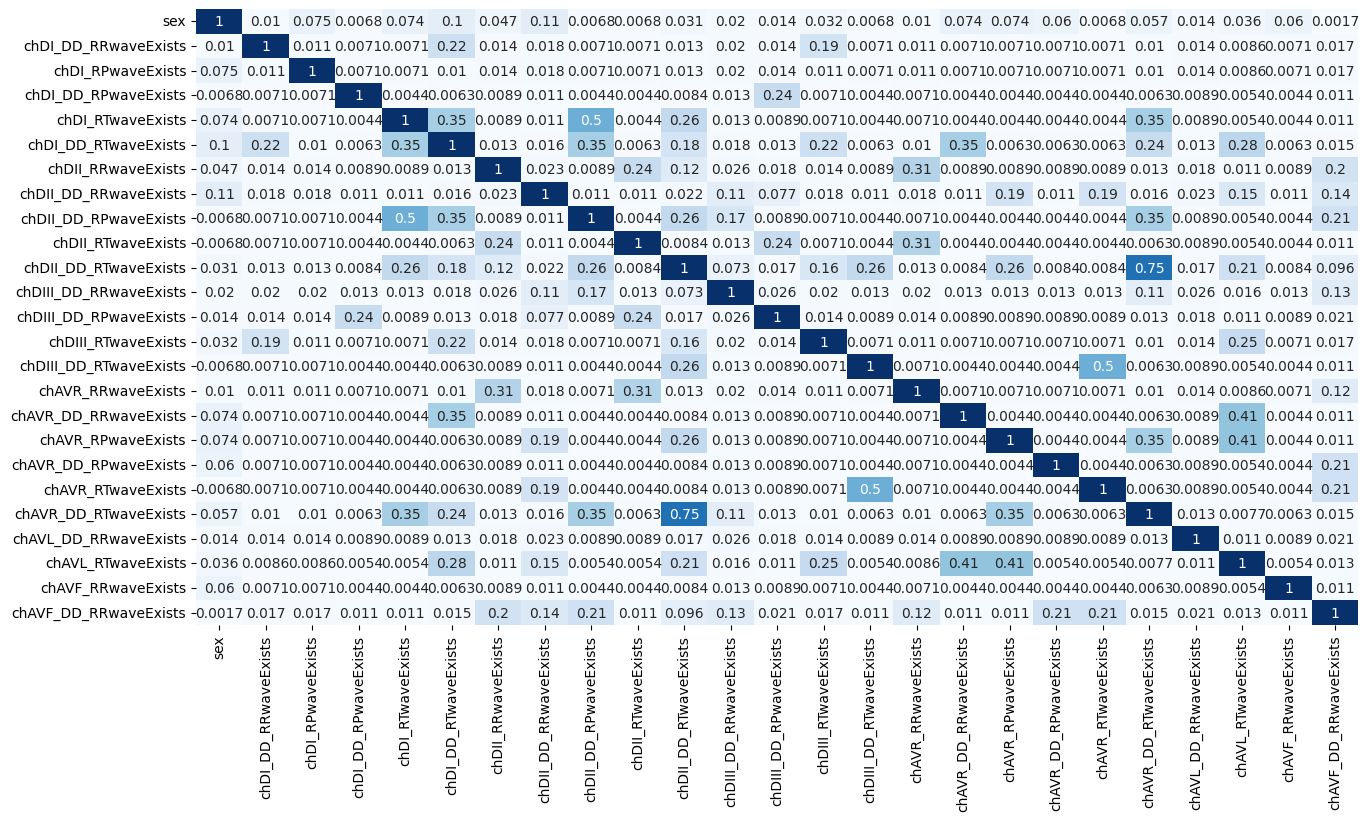

In [21]:
# correlation between categorical variables
cramersv_heatmap(data[cat_variables[:25]])
#cramersv_heatmap(data[cat_variables[25:50] + ['class']])
#cramersv_heatmap(data[cat_variables[50:75] + ['class']])

In [22]:
# correlation between categorical variables
cramerv_widget(data)

Output()

In [23]:
import numpy as np
from mlutilities.eda import cramersv, cramersv_heatmap, cramerv_widget

In [24]:
# remove variables with low correlation with the target variable
for var in cat_variables[:-1]:

    test = cramersv(data, "class", var, print_test=False, return_test=True)[0]

    if test < 0.3:
        data.drop(var, axis=1, inplace=True)

cat_variables = data.select_dtypes(include=["category"]).columns

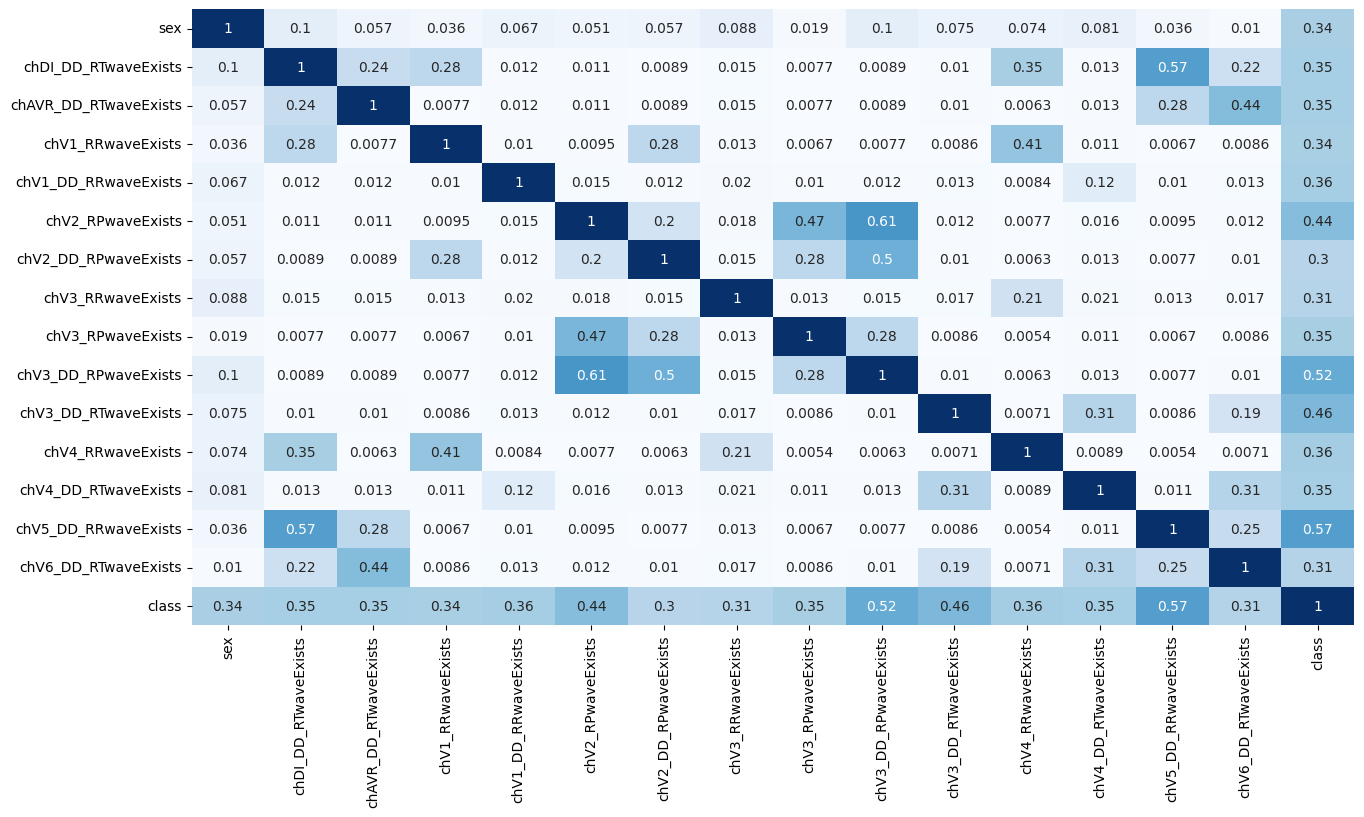

In [25]:
# print correlaton bewteen categorical variables
cramersv_heatmap(data[cat_variables])

#### Relationship between numerical and categorical variables

In [26]:
from mlutilities.eda import kruskal_test_widget, kruskal_test

In [27]:
# use kurkal test
kruskal_test_widget(data)

Output()

In [28]:
# use kurskal test to remove variables that does not pass the test
for var in num_variables:
    test_result = kruskal_test(data, "class", var, print_test=False, retunr_test=True)[-1]
    if test_result != "medians_1 != medians_2 != .....":
        data.drop(var, axis=1, inplace=True)

num_variables = data.select_dtypes(include="number").columns.tolist()

### Correlation between numerical variables

In [29]:
from mlutilities.eda import correlation_heatmap, correlation_coef_widget

In [30]:
# Correlation widget
correlation_coef_widget(data)

Output()

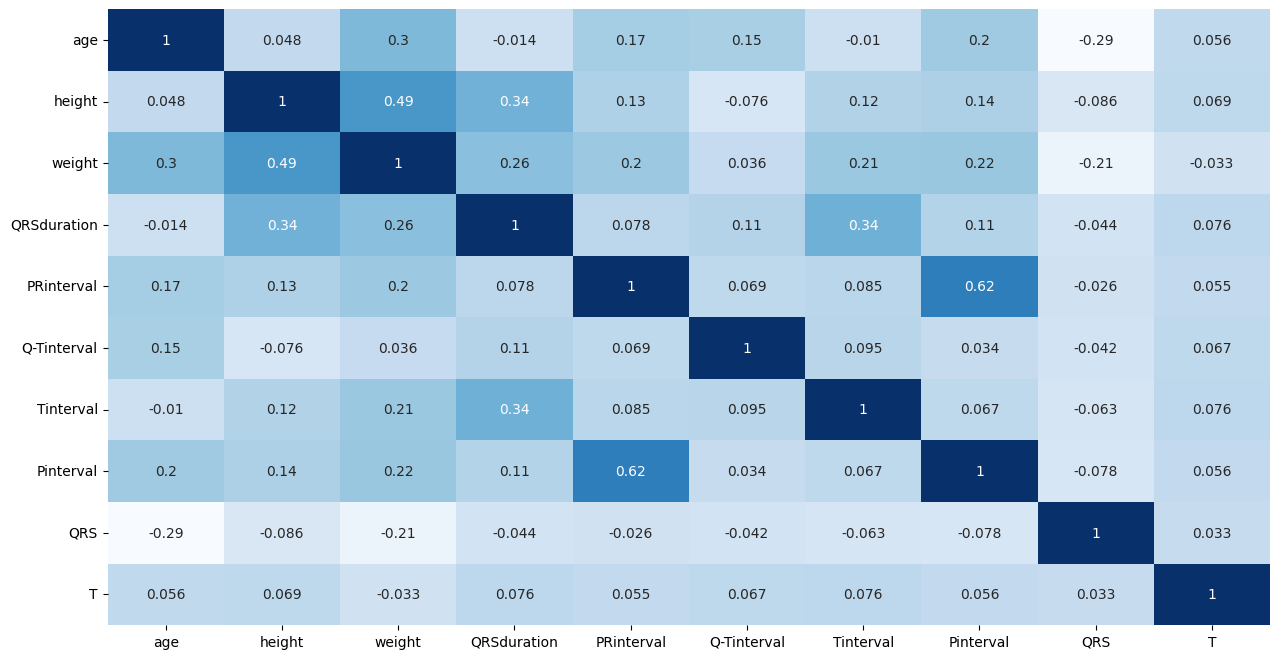

In [31]:
correlation_heatmap(data[num_variables[:10]], kind="spearman")

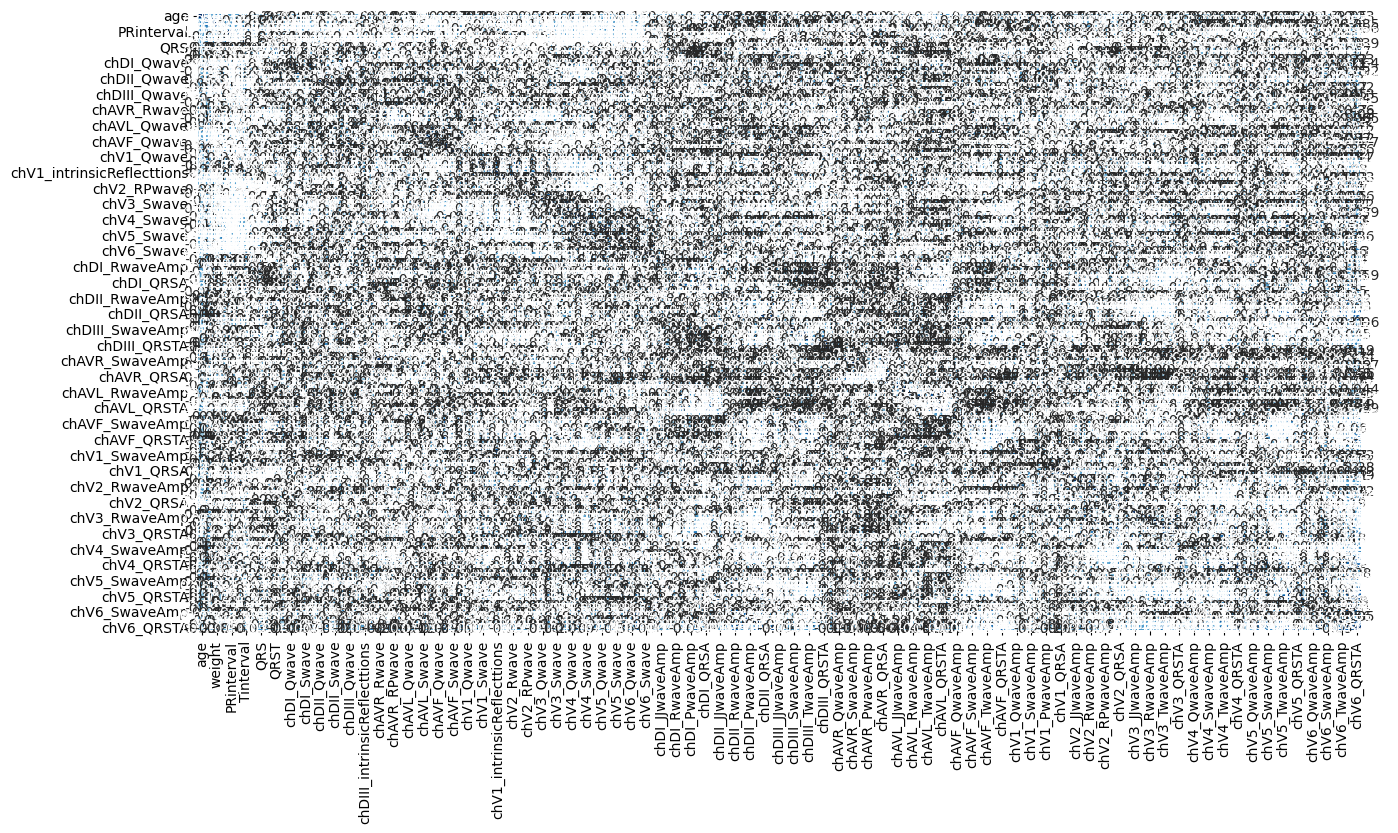

In [32]:
# Correlation heatmap
high_corr_vars = correlation_heatmap(data[num_variables], kind="spearman", return_most_correlated_features=True, threshold=0.9)

In [33]:
# variables to drop
feature_to_drop = [var for d in high_corr_vars for var in list(d.values())[0]]

In [34]:
# drop features
data.drop(labels=feature_to_drop, axis=1, inplace = True)
[num_variables.remove(var) for var in feature_to_drop]

[None, None, None, None, None, None, None]

# Modeling

In [35]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [36]:
cat_variables = cat_variables.tolist()
cat_variables.remove("class")

In [37]:
# define numerical and categorical variables
binary_cat_var = [col for col in cat_variables if data[col].nunique() == 2]
no_binary_cat_var = [col for col in cat_variables if data[col].nunique() != 2]
len(num_variables), len(binary_cat_var), len(no_binary_cat_var)

(150, 15, 0)

In [38]:
# define input and target variables
X = data[cat_variables + num_variables]
y = data["class"]

In [70]:
# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [71]:
# numerical preprocessing
num_prepro = Pipeline(
    [
        ("impute", SimpleImputer(strategy="mean")),
        ("scale", StandardScaler()),
    ]
)

In [72]:
# define preprocessing
prepro = ColumnTransformer(
    [
        ("binary_cat_var", "passthrough", binary_cat_var),
        ("no_binary_cat_var", OneHotEncoder(), no_binary_cat_var),
        ("num_var", num_prepro, num_variables),
    ]
)

In [73]:
model = Pipeline(
    [
        ("prepro", prepro),
        ("ml_model", LogisticRegression(max_iter=5000)),
    ]
)

In [74]:
model.fit(X_train, y_train)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('binary_cat_var',
                                                  'passthrough',
                                                  ['sex',
                                                   'chDI_DD_RTwaveExists',
                                                   'chAVR_DD_RTwaveExists',
                                                   'chV1_RRwaveExists',
                                                   'chV1_DD_RRwaveExists',
                                                   'chV2_RPwaveExists',
                                                   'chV2_DD_RPwaveExists',
                                                   'chV3_RRwaveExists',
                                                   'chV3_RPwaveExists',
                                                   'chV3_DD_RPwaveExists',
                                                   'chV3_DD_RTwaveExists',
                                                   'chV4_RRwaveExists',
                                                   'chV4_DD_RTwav...
                                                   'chDI_Qwave', 'chDI_Rwave',
                                                   'chDI_Swave',
                                                   'chDI_intrinsicReflecttions',
                                                   'chDII_Qwave', 'chDII_Rwave',
                                                   'chDII_Swave',
                                                   'chDII_intrinsicReflecttions',
                                                   'chDIII_Qwave',
                                                   'chDIII_Swave',
                                                   'chDIII_intrinsicReflecttions',
                                                   'chAVR_Qwave', 'chAVR_Rwave',
                                                   'chAVR_Swave',
                                                   'chAVR_RPwave',
                                                   'chAVR_intrinsicReflecttions',
                                                   'chAVL_Qwave', 'chAVL_Rwave', ...])])),
                ('ml_model', LogisticRegression(max_iter=5000))])

In [75]:
# Predictions
y_pred = model.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.82      0.82        49
           2       0.54      0.78      0.64         9
           3       0.60      1.00      0.75         3
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         3
           6       0.20      0.20      0.20         5
           7       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         2
          10       0.78      0.70      0.74        10
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4

    accuracy                           0.67        91
   macro avg       0.41      0.40      0.39        91
weighted avg       0.67      0.67      0.66        91



/home/omar/.pyenv/versions/3.10.9/envs/google-colab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/omar/.pyenv/versions/3.10.9/envs/google-colab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/omar/.pyenv/versions/3.10.9/envs/google-colab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [77]:
# create custom metrics for corss_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import f1_score


metrics = {
    "f1_score_macro": make_scorer(f1_score, average="macro"),
    "precision_macro": make_scorer(precision_score, average="macro"),
    "recall_macro": make_scorer(recall_score, average="macro"),
}

In [78]:
#apply cross val score
results = cross_validate(model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=metrics)

/home/omar/.pyenv/versions/3.10.9/envs/google-colab/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.

/home/omar/.pyenv/versions/3.10.9/envs/google-colab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/omar/.pyenv/versions/3.10.9/envs/google-colab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/home/omar/.pyenv/versions/3.10.9/envs/google-colab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with n

In [79]:
pd.DataFrame(results).mean()

fit_time                0.347207
score_time              0.028879
test_f1_score_macro     0.416261
test_precision_macro    0.438104
test_recall_macro       0.421829
dtype: float64